 # NearestCorrelationMatrix.jl

In [1]:
using CSV, DataFrames, Dates, Random, Images, TSFrames, Statistics, PortfolioAnalytics, LinearAlgebra, TimerOutputs, NearestCorrelationMatrix, NaNStatistics, LinearAlgebra.LAPACK

# Create a TimerOutput, this will store all our timing information
const to = TimerOutput();

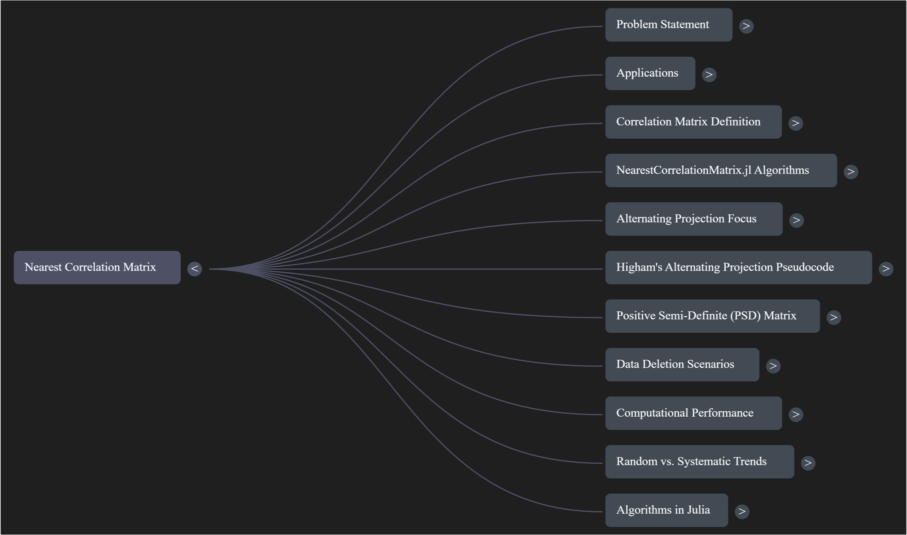

In [2]:
img = load(raw"C:\Users\Z2005081\Downloads\NotebookLM Mind Map.png")
display(img)

### NearestCorrelationMatrix.jl is a package that does exactly what the name implies. This library finds the nearest correlation matrix in the Frobenius norm to an input correlation matrix; a problem that is common in 

### 🔬 **1. Machine Learning & Data Science**
- In **PCA (Principal Component Analysis)** and **covariance matrix estimation**, sometimes the sample correlation matrix is not positive semidefinite due to numerical errors or missing data.
- Algorithms like **Gaussian processes**, **kernel methods**, or **latent variable models** require valid (PSD) covariance/correlation matrices.

---

### 🧠 **2. Neuroscience & Psychology**
- Correlation matrices are used to represent **functional connectivity** between regions of the brain using fMRI or EEG data.
- If measurements are noisy or incomplete, estimated matrices may not be valid correlation matrices, requiring projection to the nearest one.

---

### 💉 **3. Bioinformatics / Genomics**
- In **gene co-expression networks**, correlation matrices represent relationships between gene expressions.
- Large-scale data often needs regularization or correction when constructing valid correlation structures.

---

### 🛰️ **4. Signal Processing / Radar Systems**
- Correlation matrices are used in **antenna arrays**, **beamforming**, and **channel estimation**.
- These matrices must often be positive semidefinite to ensure valid signal reconstructions.

---

### 🧮 **5. Statistics & Econometrics**
- Empirical correlation matrices in **survey data**, **panel data**, or **imputation methods** may be invalid due to estimation error, needing correction.

---

### 🧑‍⚖️ **6. Risk Modeling & Insurance**
- Beyond finance, **actuarial science** uses correlation matrices to model dependencies between insurance risks.
- Risk aggregation often requires valid copula models, which depend on accurate correlation matrices.

---

### ⚙️ **7. Control Systems / Robotics**
- In **Kalman filters** or **state-space modeling**, the covariance (and correlation) matrices of state estimation errors must remain valid.

---

### 🎮 Bonus Thought:
If you’re dealing with **simulation**, **Bayesian networks**, or **graphical models**—basically anywhere variables interact probabilistically—you're often using or needing a valid correlation matrix.

---


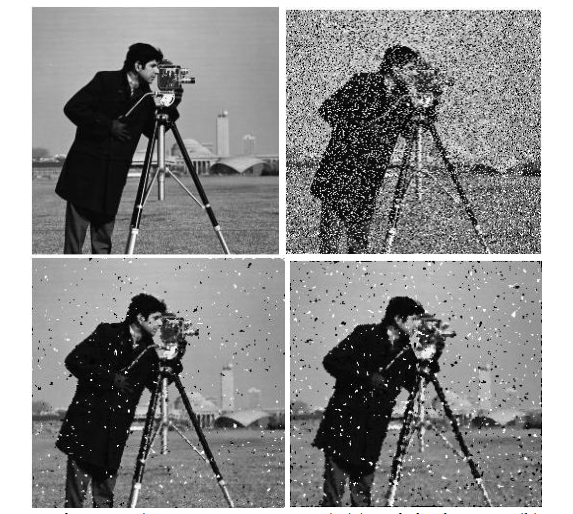

In [3]:
img = load(raw"C:\Users\Z2005081\Downloads\denoise.png")
display(img)



### **Correlation Matrix**

A **correlation matrix** is a table that displays the **correlation coefficients** between multiple variables. It is a powerful statistical tool used to examine the **strength and direction** of linear relationships between pairs of variables in a dataset.

Each cell in the matrix represents the **correlation coefficient** (_often denoted as_ **r**) between two variables. These values range from **-1** to **1**, where:

- **1** indicates a **perfect positive linear correlation** (as one variable increases, the other increases proportionally).
- **0** indicates **no linear correlation** (the variables do not have a linear relationship).
- **-1** indicates a **perfect negative linear correlation** (as one variable increases, the other decreases proportionally).

#### Example Format:

|       | X₁   | X₂   | X₃   |
|-------|------|------|------|
| **X₁** | 1    | 0.8  | -0.4 |
| **X₂** | 0.8  | 1    | -0.1 |
| **X₃** | -0.4 | -0.1 | 1    |

- The **diagonal** always contains **1s**, because each variable is perfectly correlated with itself.
- The matrix is **symmetric**, so the correlation between X₁ and X₂ is the same as between X₂ and X₁.

---


## Key Algorithms in NearestCorrelationMatrix.jl

**Newton**: a quadratically convergent algorithm that should prove fast and accurate

**AlternatingProjections**: a simple linearly convergent algorithm

**DirectProjection**: a one-step projection onto the cone of correlation matrices

**JuMPAlgorithm**: an extension algorithm that is available when JuMP is loaded

# FOCUS: Alternating projections

Given a symmetric matrix, What is the nearest correlation matrix? That is, the nearest symmetric postive semidefinite matrix with unit diagonal.

### 🔷 **What is a Positive Semi-Definite (PSD) Matrix?**

A **symmetric** matrix $$\ A \in \mathbb{R}^{n \times n} \$$ is **Positive Semi-Definite (PSD)** if:

$$\
\mathbf{x}^T A \mathbf{x} \geq 0 \quad \text{for all} \quad \mathbf{x} \in \mathbb{R}^n
\$$

This means that for **any non-zero vector** $\mathbf{x}$, the **quadratic form** $\mathbf{x}^T A \mathbf{x}$ is **non-negative**.

---

### 🔍 **Key Properties of PSD Matrices**

### 🔷 Positive Semi-Definite (PSD) Matrix

A matrix $ A \in \mathbb{R}^{n \times n} $ is **positive semi-definite** if:

$$
\mathbf{x}^T A \mathbf{x} \geq 0 \quad \text{for all} \quad \mathbf{x} \in \mathbb{R}^n
$$


1. ✅ **Symmetric**: All PSD matrices are symmetric. That is, $ A = A^T $.
2. ✅ **Eigenvalues**: All eigenvalues of a PSD matrix are **greater than or equal to 0**.
3. ✅ **Cholesky decomposition**: A matrix is PSD if and only if it has a Cholesky decomposition (though for positive **definite** matrices, the decomposition is unique).
4. ✅ **Covariance and Correlation Matrices**: These are always **PSD** by construction.

---

### 🧠 **Why PSD Matters**

- **Optimization**: Many convex optimization problems require the matrix to be PSD to ensure the problem is well-behaved (convex).
- **Machine Learning**: Kernel matrices in SVMs must be PSD.
- **Finance**: Covariance matrices used in portfolio optimization must be PSD to ensure valid risk measures.
- **Numerical stability**: In algorithms involving matrix factorization, PSD ensures numerical stability.



# 📘 Higham's Alternating Projection Pseudocode

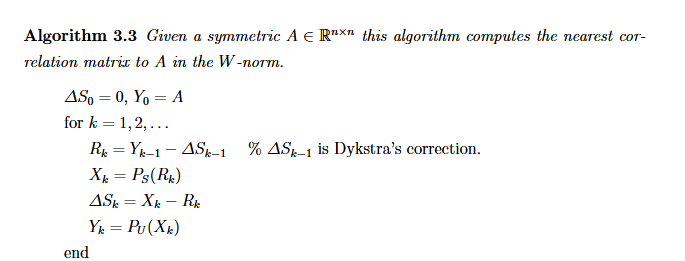

In [4]:
img = load(raw"C:\Users\Z2005081\Downloads\Screenshot 2025-03-31 at 10-50-51.png")
display(img)

### 🔍 Parameters in Algorithm 3.3 Pseudocode

- `A`     : Input symmetric matrix ∈ ℝⁿˣⁿ
- `ΔS₀`   : Initial Dykstra correction matrix (set to zero)
- `Y₀`    : Initial matrix (set to A)
- `k`     : Iteration index (k = 1, 2, ...)
- `Rₖ`    : Intermediate matrix = Yₖ₋₁ − ΔSₖ₋₁
- `Xₖ`    : Projection of Rₖ onto the set S → `P_S(Rₖ)`
- `ΔSₖ`   : Updated Dykstra correction = Xₖ − Rₖ
- `Yₖ`    : Projection of Xₖ onto the set U → `P_U(Xₖ)`


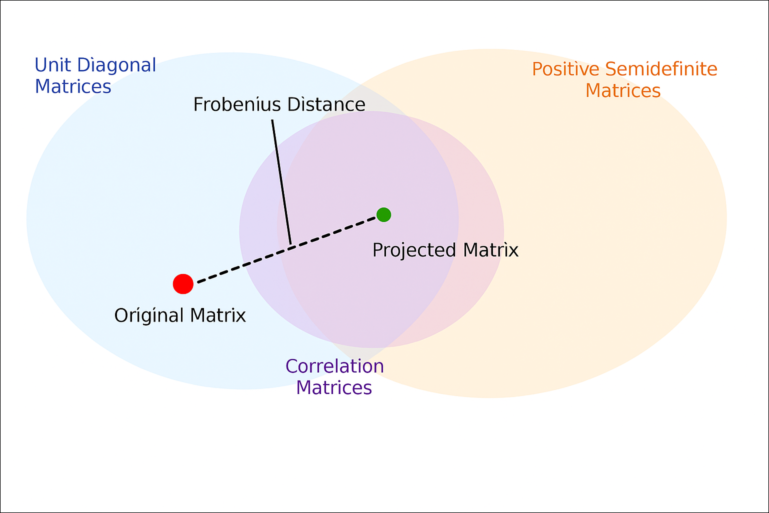

In [5]:
img = load(raw"C:\Users\Z2005081\Downloads\7AF205E0-7234-4971-B803-97FE9A2202B4.png")
display(img)

In [6]:
# Function to project onto the PSD matrix with timing
function Project_onto_PSD(A::Matrix{Float64}, timer::TimerOutput=to)::Matrix{Float64}
    local result
    @timeit timer "Project_onto_PSD" begin
        λ, V = eigen(Symmetric(A))  # Eigenvalue decomposition
        λ[λ .< 0] .= 0.0  # Set all negative eigenvalues exactly to zero
        result = V * Diagonal(λ) * V'  # Reconstruct PSD matrix
    end
    return result
end

Project_onto_PSD (generic function with 2 methods)

In [7]:
# Function to project onto the unit diagonal (in-place) with timing
function project_onto_UD!(A::Matrix{Float64}, timer::TimerOutput=to)::Matrix{Float64}
    @timeit timer "project_onto_UD!" begin
        for i in 1:size(A, 1)
            A[i, i] = 1.0
        end
    end
    return A
end

project_onto_UD! (generic function with 2 methods)

In [8]:
# Function for POCS with Dykstra's Correction with timing
function nearest_corr_dykstra(A::Matrix{Float64}, tol::Float64=1e-8, max_iter::Int=200, timer::TimerOutput=to)
    # Preallocate matrices for memory efficiency
    Y_k = copy(A)
    ΔS_k = zeros(size(A))
    R_k = similar(A)
    X_k = similar(A)
    diff_matrix = similar(A)

    @timeit timer "nearest_corr_dykstra" begin
        for k in 1:max_iter
            # Compute R_k = Y_k - ΔS_k in place
            R_k .= Y_k .- ΔS_k

            # Project R_k onto PSD cone with timing
            X_k .= Project_onto_PSD(R_k, timer)

            # Update ΔS_k = X_k - R_k in place
            ΔS_k .= X_k .- R_k

            # Project X_k onto unit diagonal in place with timing
            Y_k .= X_k
            project_onto_UD!(Y_k, timer)

            # Convergence check
            diff_matrix .= Y_k .- X_k
            if norm(diff_matrix, Inf) / norm(Y_k, Inf) <= tol
                println("Converged after $k iterations")
                return Y_k, k
            end
        end
        println("Reached maximum iterations ($max_iter) without convergence")
        return Y_k, max_iter
    end
end

nearest_corr_dykstra (generic function with 4 methods)

## Example

In [9]:
# Define Matrix
A_symm = [ 2 -1  0  0;
     -1  2 -1  0;
      0 -1  2 -1;
      0  0 -1  2.0]  # Define a symmetric matrix

4×4 Matrix{Float64}:
  2.0  -1.0   0.0   0.0
 -1.0   2.0  -1.0   0.0
  0.0  -1.0   2.0  -1.0
  0.0   0.0  -1.0   2.0

In [10]:
issymmetric(A_symm)

true

In [11]:
# Example usage with timing
A_symm  # Matrix

println("=== POCS with Dykstra ===")
reset_timer!(to)  # Clear previous timings
result, iterations = nearest_corr_dykstra(A_symm)
show(to)

# Verify the result is PSD
min_eigenval = minimum(eigen(Symmetric(result)).values)
println("\nMinimum Eigenvalue after projection: ", min_eigenval)
println("|| A - X ||_F:: ", norm(A_symm - result))

=== POCS with Dykstra ===
Converged after 19 iterations
─────────────────────────────────────────────────────────────────────────────────
                                        Time                    Allocations      
                               ───────────────────────   ────────────────────────
       Tot / % measured:            1.58s /   0.2%           60.8MiB /   0.1%    

Section                ncalls     time    %tot     avg     alloc    %tot      avg
─────────────────────────────────────────────────────────────────────────────────
nearest_corr_dykstra        1   3.27ms  100.0%  3.27ms   66.2KiB  100.0%  66.2KiB
  Project_onto_PSD         19   2.73ms   83.6%   144μs   57.0KiB   86.1%  3.00KiB
  project_onto_UD!         19   1.50μs    0.0%  78.9ns     0.00B    0.0%    0.00B
─────────────────────────────────────────────────────────────────────────────────
-5.120313906149992e-9ter projection: 
|| A - X ||_F:: 2.133729106546587


In [12]:
result

4×4 Matrix{Float64}:
  1.0       -0.808412   0.191588   0.106775
 -0.808412   1.0       -0.656233   0.191588
  0.191588  -0.656233   1.0       -0.808412
  0.106775   0.191588  -0.808412   1.0

In [13]:
eigvals(result)

4-element Vector{Float64}:
 -5.1203141182831794e-9
  0.204427369422255
  1.4505423553260148
  2.3450302803720415

In [14]:
# Checking Frobenius norm
frobenius_norm = norm(A_symm-result)  
println(frobenius_norm)

2.133729106546587


In [15]:
rank(result)

4

# Evaluating the Stability of Correlation Matrix Spectra Under Asset Deletion Using the Projection Method


### Table 1.1: Unbiased (Random) Deletion Scenarios — Simple Stock Data Examples

| Deletion % | Unbiased Condition              | Example                                                                 |
|------------|----------------------------------|-------------------------------------------------------------------------|
| 5%         | Occasional Logging Errors        | A few stock prices are missing because the data app froze briefly during market hours. |
| 10%        | Sporadic Human Entry Errors      | Someone entering stock data by hand skips a few entries by accident. |
| 20%        | Random Technical Glitches        | The trading platform glitches and drops random stock prices across different companies. |
| 30%        | Periodic Network Interruptions   | The internet cuts out randomly during data collection, so some timestamps are blank. |
| 40%        | Unpredictable Server Failures    | A backup server crashes and loses random chunks of stock data from various companies. |
| 50%        | Major System-Wide Failures       | Half the stock price data is gone because the main cloud server failed during trading hours. |



### Random Deletion (Unbiased) — 10×10 Stock Price Matrix (Example)

Missing values appear in random spots.

| Day \ Stock | S1   | S2   | S3   | S4   | S5   | S6   | S7   | S8   | S9   | S10  |
|-------------|------|------|------|------|------|------|------|------|------|------|
| Day 1       | 145  | 133  | 150  | 157  | 168  | 142  | 155  | 160  | 149  | 139  |
| Day 2       | 141  | 138  | 154  | 147  | 163  | 150  | 139  | 157  | 162  | 143  |
| Day 3       | 149  | 135  | 152  | missing | 161  | 146  | 153  | 148  | 165  | 140  |
| Day 4       | 146  | 132  | 149  | 144  | 167  | missing | 159  | 150  | 147  | 142  |
| Day 5       | 147  | 134  | 151  | 145  | missing | 148  | 158  | 155  | 150  | 141  |
| Day 6       | 150  | 136  | 153  | 146  | 164  | 149  | 157  | 156  | missing | 144  |
| Day 7       | 148  | 137  | 150  | 143  | 162  | 147  | 154  | 151  | 148  | 145  |
| Day 8       | missing | 139  | 155  | 148  | 165  | 151  | 160  | 159  | 152  | 146  |
| Day 9       | 144  | 131  | 148  | 142  | 166  | 143  | 156  | 153  | 151  | 138  |
| Day 10      | 143  | missing | 146  | 141  | 169  | 144  | 161  | 158  | 146  | 137  |

---

### Table 1.2: Systematic (Nonrandom) Deletion Scenarios — Simple Stock Data Examples

| Deletion % | Market Condition                 | Example                                                                 |
|------------|----------------------------------|-------------------------------------------------------------------------|
| 5%         | High Market Volatility           | During a fast price swing, the system freezes and fails to record high-volatility stocks. |
| 10%        | Liquidity Crisis                 | Low-traded (illiquid) stocks stop reporting prices because no one is buying or selling them. |
| 20%        | Market Crashes or Bubbles        | A crash hits tech stocks, and all data from that sector is missing during panic selling. |
| 30%        | Regulatory Changes               | A new rule changes how penny stocks are reported, so their old format data is removed. |
| 40%        | Technical/Operational Failures   | A major broker platform goes down, and all price data for stocks traded there is lost. |
| 50%        | Geopolitical Events / Shocks     | An event outbreak shuts down a country’s stock exchange — all stocks from that market vanish. |



### Systematic Deletion (Nonrandom) — 10×10 Stock Price Matrix(Example)

Missing values occur in full rows or columns.

- Stocks 3 & 4 are missing (e.g., sector went down)
- Day 7 is missing (e.g., market outage)

| Day \ Stock | S1   | S2   | S3     | S4     | S5   | S6   | S7   | S8   | S9   | S10  |
|-------------|------|------|--------|--------|------|------|------|------|------|------|
| Day 1       | 145  | 133  | missing | missing | 168  | 142  | 155  | 160  | 149  | 139  |
| Day 2       | 141  | 138  | missing | missing | 163  | 150  | 139  | 157  | 162  | 143  |
| Day 3       | 149  | 135  | missing | missing | 161  | 146  | 153  | 148  | 165  | 140  |
| Day 4       | 146  | 132  | missing | missing | 167  | 145  | 159  | 150  | 147  | 142  |
| Day 5       | 147  | 134  | missing | missing | 160  | 148  | 158  | 155  | 150  | 141  |
| Day 6       | 150  | 136  | missing | missing | 164  | 149  | 157  | 156  | 159  | 144  |
| Day 7       | missing | missing | missing | missing | missing | missing | missing | missing | missing | missing |
| Day 8       | 148  | 139  | missing | missing | 165  | 151  | 160  | 159  | 152  | 146  |
| Day 9       | 144  | 131  | missing | missing | 166  | 143  | 156  | 153  | 151  | 138  |
| Day 10      | 143  | 130  | missing | missing | 169  | 144  | 161  | 158  | 146  | 137  |







##  Speed is my main priority over memory in this presention

### 🔷LAPACK in Julia

Julia uses LAPACK under the hood for many linear algebra routines via LinearAlgebra standard library. It's heavily optimized, especially with OpenBLAS or MKL backends.

### 🔷eigen() in Julia (LinearAlgebra)

Julia’s eigen() function calls LAPACK under the hood. It automatically picks the best routine based on the matrix type

# Loading the Data

In [16]:
function load_stocks(data_dir::String, stock_files::Vector{String})
    combined_df = DataFrame()  # Create an empty DataFrame to store the combined data
    
    # Iterate over each stock file
    for file in stock_files
        path = joinpath(data_dir, file)  # Get the full path of the file
        
        if isfile(path)
            # Load the CSV file into a DataFrame
            df = CSV.read(path, DataFrame)
            
            # Select required columns (including the ticker symbol)
            select!(df, [:Date, :Ticker, :Close, :Sector])
            
            # Append the DataFrame to the combined DataFrame
            append!(combined_df, df)
        else
            println("File not found: $file")  # Print an error if file is missing
        end
    end
    
    return combined_df
end

load_stocks (generic function with 1 method)

In [17]:
# Specify the data directory and list of stock files to load
data_dir = "C:/Users/Z2005081/Downloads/COPY FROM SCHOOL PC/DATA_MINNER/FULL_2020_2025_11_SECTION"
stock_files = [
    "Consumer_Discretionary.csv", "Consumer_Staples.csv", "Energy.csv",
    "Financials.csv", "Health_Care.csv", "Industrials.csv",         # Note: It must be UFT-8 CSV
    "Information_Technology.csv", "Materials.csv", "Real_Estate.csv", "Communication_Services.csv", "Utilities.csv"
]

# Call the function to load the stocks
combined_df = load_stocks(data_dir, stock_files)

# Display the combined DataFrame
println("\nStock Data:\n")
show(combined_df)


Stock Data:

1133687×4 DataFrame
     Row │ Date                       Ticker   Close    Sector                 ⋯
         │ String31                   String7  Float64  String31               ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │ 2017-01-03 00:00:00-05:00  AMZN     37.6835  Consumer Discretionary ⋯
       2 │ 2017-01-04 00:00:00-05:00  AMZN     37.859   Consumer Discretionary
       3 │ 2017-01-05 00:00:00-05:00  AMZN     39.0225  Consumer Discretionary
       4 │ 2017-01-06 00:00:00-05:00  AMZN     39.7995  Consumer Discretionary
       5 │ 2017-01-09 00:00:00-05:00  AMZN     39.846   Consumer Discretionary ⋯
       6 │ 2017-01-10 00:00:00-05:00  AMZN     39.795   Consumer Discretionary
       7 │ 2017-01-11 00:00:00-05:00  AMZN     39.951   Consumer Discretionary
       8 │ 2017-01-12 00:00:00-05:00  AMZN     40.682   Consumer Discretionary
       9 │ 2017-01-13 00:00:00-05:00  AMZN     40.857   Consumer Discretionary ⋯
      

In [18]:
df = DataFrame(combined_df)

# Group by sector and count the number of stocks in each sector
sector_counts = combine(groupby(df, :Sector), DataFrames.nrow => :Count)

# Display the count of stocks in each sector
println("\nNumber of Stocks in Each Sector:\n")
show(sector_counts, allrows=true, allcols=true)



Number of Stocks in Each Sector:

11×2 DataFrame
 Row │ Sector                  Count  
     │ String31                Int64  
─────┼────────────────────────────────
   1 │ Consumer Discretionary  102369
   2 │ Consumer Staples        103750
   3 │ Energy                  103142
   4 │ Financials              103750
   5 │ Health Care             103750
   6 │ Industrials             103660
   7 │ Information Technology  103750
   8 │ Materials               102594
   9 │ Real Estate             103730
  10 │ Communication Services   99442
  11 │ Utilities               103750

In [19]:
df = DataFrame(combined_df)

# Group by sector and count the number of unique tickers in each sector
sector_ticker_counts = combine(groupby(df, :Sector), :Ticker => (tickers -> length(unique(tickers))) => :Ticker_Count)

# Display the count of unique tickers in each sector
println("\nNumber of Unique Tickers in Each Sector:\n")
show(sector_ticker_counts, allrows=true, allcols=true)



Number of Unique Tickers in Each Sector:

11×2 DataFrame
 Row │ Sector                  Ticker_Count 
     │ String31                Int64        
─────┼──────────────────────────────────────
   1 │ Consumer Discretionary            50
   2 │ Consumer Staples                  50
   3 │ Energy                            50
   4 │ Financials                        50
   5 │ Health Care                       50
   6 │ Industrials                       50
   7 │ Information Technology            50
   8 │ Materials                         50
   9 │ Real Estate                       50
  10 │ Communication Services            50
  11 │ Utilities                         50

In [20]:
# Count the number of unique stocks (replace "Ticker" with the actual column name)
num_stocks = length(unique(combined_df.Ticker))
println("\nNumber of unique stocks: ", num_stocks)


Number of unique stocks: 550


In [21]:
# Extract unique tickers from the combined DataFrame
tickers = unique(combined_df.Ticker)

# Filter the combined DataFrame by the extracted tickers
filtered_df = filter(:Ticker => t -> t in tickers, combined_df)

# Select only the required columns
filtered_df = filtered_df[:, ["Date", "Ticker", "Close"]]

# Correctly parse the DateTime with the specified format
filtered_df[!, "Date"] = DateTime.(filtered_df.Date, "yyyy-mm-dd HH:MM:SS-HH:MM")

# Define the date range for filtering
start_date = DateTime("2020-01-02")
end_date = DateTime("2025-03-08")


# Filter the DataFrame for the specified date range
daily_df = filter(row -> start_date <= row.Date <= end_date, filtered_df)

# Sort the DataFrame by Date and Ticker
sort!(daily_df, [:Date, :Ticker])


716100×3 DataFrame
    Row │ Date                 Ticker   Close    
        │ DateTime             String7  Float64  
────────┼────────────────────────────────────────
      1 │ 2020-01-02T05:00:00  A         82.8853
      2 │ 2020-01-02T05:00:00  AA        20.6555
      3 │ 2020-01-02T05:00:00  AAL       28.9829
      4 │ 2020-01-02T05:00:00  AAP      143.805
      5 │ 2020-01-02T05:00:00  AAPL      72.7161
      6 │ 2020-01-02T05:00:00  ABBV      71.5898
      7 │ 2020-01-02T05:00:00  ABT       79.274
      8 │ 2020-01-02T05:00:00  ACN      195.264
      9 │ 2020-01-02T05:00:00  ADBE     334.43
     10 │ 2020-01-02T05:00:00  ADC       54.3635
     11 │ 2020-01-02T05:00:00  ADI      109.436
   ⋮    │          ⋮              ⋮        ⋮
 716091 │ 2025-03-07T05:00:00  XEL       67.4356
 716092 │ 2025-03-07T05:00:00  XOM      109.02
 716093 │ 2025-03-07T05:00:00  XRAY      16.153
 716094 │ 2025-03-07T05:00:00  XYL      130.62
 716095 │ 2025-03-07T05:00:00  YORW      34.48
 716096 │ 2025-03-07T05:00:00  YUM      162.53
 716097 │ 2025-03-07T05:00:00  ZBRA     292.69
 716098 │ 2025-03-07T05:00:00  ZG        73.85
 716099 │ 2025-03-07T05:00:00  ZM        75.98
 716100 │ 2025-03-07T05:00:00  ZTS      170.37
                              716079 rows omitted

In [22]:
# Pivot the DataFrame to get the desired format, handling duplicates by taking the mean
pivoted_df = unstack(daily_df, :Date, :Ticker, :Close, combine = mean)

# Sort by Date (Index)
sort!(pivoted_df, :Date)

# Convert the DataFrame to a TSFrame
tsframe = TSFrame(pivoted_df, :Date)


1302×550 TSFrame with DateTime Index
 Index                A         AA        AAL       AAP       AAPL      ABBV   ⋯
 DateTime             Float64?  Float64?  Float64?  Float64?  Float64?  Float6 ⋯
────────────────────────────────────────────────────────────────────────────────
 2020-01-02T05:00:00   82.8853   20.6555   28.9829   143.805   72.7161   71.58 ⋯
 2020-01-03T05:00:00   81.5545   20.7326   27.5482   143.814   72.0091   70.91
 2020-01-06T05:00:00   81.7955   20.2505   27.2194   141.451   72.5829   71.46
 2020-01-07T05:00:00   82.0463   20.559    27.1198   139.773   72.2415   71.06
 2020-01-08T05:00:00   82.8563   19.7297   27.7375   138.167   73.4036   71.56 ⋯
 2020-01-09T05:00:00   84.1582   19.1029   27.8471   137.905   74.9628   72.11
 2020-01-10T05:00:00   84.4668   18.7558   27.2194   134.423   75.1323   71.19
 2020-01-13T05:00:00   84.3414   18.9101   27.2892   131.04    76.7374   70.76
 2020-01-14T05:00:00   84.8525   19.6429   27.4286   134.324   75.7012   71.46 ⋯
 20

# Log Returns

In [23]:

all_tickers = unique(daily_df.Ticker)
pivoted_df = unstack(daily_df, :Date, :Ticker, :Close, combine = mean)
for ticker in setdiff(all_tickers, names(pivoted_df)[2:end])
    pivoted_df[!, ticker] = fill(NaN, nrow(pivoted_df))
end
     

In [24]:

# Step 1: Manually calculate log returns (with missing support)
asset_returns = DataFrame()

for name in names(tsframe)
    prices = tsframe[:, name]
    log_rets = Vector{Union{Missing, Float64}}(undef, length(prices))
    log_rets[1] = missing  # First log return is undefined

    for i in 2:length(prices)
        if ismissing(prices[i]) || ismissing(prices[i - 1])
            log_rets[i] = missing
        else
            log_rets[i] = log(prices[i] / prices[i - 1])
        end
    end

    asset_returns[!, name] = log_rets
end

# Step 2: Convert each column to a vector, skipping missing values
returns_vectors = Dict(
    name => collect(skipmissing(asset_returns[:, name])) for name in names(asset_returns)
)

# Step 3: Align all vectors to the shortest one
minlen = minimum(length.(values(returns_vectors)))
returns_vectors = Dict(k => v[1:minlen] for (k, v) in returns_vectors)

# Step 4: Final DataFrame
returns_df = DataFrame(returns_vectors)


1301×550 DataFrame
  Row │ A             AA            AAL          AAP           AAPL          A ⋯
      │ Float64       Float64       Float64      Float64       Float64       F ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ -0.0161861     0.00372787   -0.0507687    6.28136e-5   -0.0097697    - ⋯
    2 │  0.00295162   -0.0235304    -0.0120067   -0.0165711     0.00793663
    3 │  0.00306076    0.0151233    -0.00366705  -0.0119332    -0.00471426   -
    4 │  0.00982468   -0.041174      0.0225219   -0.0115548     0.0159585
    5 │  0.0155899    -0.0322849     0.00394341  -0.00189535    0.0210183      ⋯
    6 │  0.00366021   -0.0183396    -0.0227982   -0.0255745     0.00225809   -
    7 │ -0.00148513    0.00819257    0.00255895  -0.0254879     0.0211394    -
    8 │  0.00604117    0.0380235     0.0050984    0.0247496    -0.0135955
    9 │  0.00713467   -0.00937109    0.00181449   0.00875949   -0.0042946      ⋯
   10 │  0.00943389   -0.126618      0.0232944    0.0114512     0.0124486
   11 │  0.00735088   -0.00507453    0.00600385  -0.00587488    0.0110102    -
  ⋮   │      ⋮             ⋮             ⋮            ⋮             ⋮          ⋱
 1292 │ -0.000664982   0.0178627     0.0052391   -0.0146089     0.00629253
 1293 │ -0.00816466   -0.0187353    -0.0118267    0.0692576    -0.000242898    ⋯
 1294 │  0.00215904   -0.0205768     0.00329926  -0.196369     -0.0274124    -
 1295 │ -0.0565243    -0.00715356   -0.0437633   -0.0198239    -0.0128126
 1296 │  0.0065882    -0.0053989    -0.0124655   -0.00162463    0.0189512
 1297 │ -0.0125075    -0.0594787    -0.0340217   -0.0412173    -0.0158796      ⋯
 1298 │ -0.0262255    -0.00256492   -0.0382118   -0.0237187    -0.00886159   -
 1299 │  0.0276493     0.0387267     0.0539489   -0.00667356   -0.000805594
 1300 │  0.000316145   0.0138018    -0.0614678   -0.0211834    -0.00174073   -
 1301 │  0.00118453    0.000304502  -0.0167432    0.0504454     0.0157676      ⋯
                                               545 columns and 1280 rows omitted

In [25]:
# Convert the DataFrame to a matrix
returns_matrix = Matrix(returns_df)

1301×550 Matrix{Float64}:
 -0.0161861     0.00372787   -0.0507687   …  -0.0211773     0.000149
  0.00295162   -0.0235304    -0.0120067       0.0441933    -0.00770659
  0.00306076    0.0151233    -0.00366705      0.02222       0.00337392
  0.00982468   -0.041174      0.0225219       0.00899974   -0.00217303
  0.0155899    -0.0322849     0.00394341      0.000964382   0.0131917
  0.00366021   -0.0183396    -0.0227982   …   0.0064511     0.00376903
 -0.00148513    0.00819257    0.00255895      0.0127789     0.00690983
  0.00604117    0.0380235     0.0050984      -0.0118215     0.00555206
  0.00713467   -0.00937109    0.00181449      0.0503771     0.00920902
  0.00943389   -0.126618      0.0232944      -0.0108463     0.00648478
  0.00735088   -0.00507453    0.00600385  …  -0.00725266    0.00658575
 -0.00567545   -0.0327525    -0.0431721       0.0153658     0.0125492
  0.00578632   -0.031447      0.004402       -0.0156305    -0.00303405
  ⋮                                       ⋱            

# Unbiased or Random Test

In [26]:
# Function to randomly delete data (set to NaN)
function delete_random_data!(matrix::Matrix{Float64}, fraction::Float64)
    Random.seed!(05)  # For reproducibility
    for i in 1:size(matrix, 1)
        for j in 1:size(matrix, 2)
            if rand() < fraction
                matrix[i, j] = NaN
            end
        end
    end
    return matrix
end

returns_matrix = Matrix(returns_df)

# Apply the deletion (e.g., % of values set to NaN)
delete_random_data!(returns_matrix, 0.05)
println("Number of NaNs after deletion: ", sum(isnan.(returns_matrix)))            

Number of NaNs after deletion: 35575


# Systematic or NonRandom Test

In [41]:
# Function to systematically delete data (set to NaN) - High Market Volatility scenario
function delete_systematic_data!(matrix::Matrix{Float64}, fraction::Float64)
    Random.seed!(5)  # For reproducibility, matching your original
    n_rows, n_cols = size(matrix)
    total_elements = n_rows * n_cols
    target_nans = round(Int, fraction * total_elements)  # Number of elements to delete
    
    # Get indices of largest absolute values
    abs_matrix = abs.(matrix)
    sorted_indices = sortperm(vec(abs_matrix), rev=true)[1:target_nans]
    
    # Convert to row, col indices and delete systematically
    deleted = 0
    for i in 1:n_rows
        for j in 1:n_cols
            idx = (i - 1) * n_cols + j
            if deleted < target_nans && idx in sorted_indices
                matrix[i, j] = NaN
                deleted += 1
            end
            if deleted >= target_nans
                break
            end
        end
    end
    return matrix
end

returns_matrix = Matrix(returns_df)

# Apply the deletion (e.g., % of values set to NaN)
delete_systematic_data!(returns_matrix, 0.05)
println("Number of NaNs after deletion: ", sum(isnan.(returns_matrix)))

Number of NaNs after deletion: 35778


In [27]:
returns_matrix

1301×550 Matrix{Float64}:
  -0.0161861     0.00372787   NaN           …   -0.0211773      0.000149
   0.00295162   -0.0235304     -0.0120067        0.0441933     -0.00770659
   0.00306076    0.0151233     -0.00366705       0.02222        0.00337392
   0.00982468   -0.041174       0.0225219        0.00899974    -0.00217303
   0.0155899    -0.0322849      0.00394341       0.000964382    0.0131917
   0.00366021   -0.0183396     -0.0227982   …    0.0064511      0.00376903
  -0.00148513    0.00819257     0.00255895       0.0127789      0.00690983
   0.00604117    0.0380235      0.0050984       -0.0118215      0.00555206
   0.00713467   -0.00937109     0.00181449       0.0503771      0.00920902
   0.00943389   -0.126618       0.0232944       -0.0108463      0.00648478
 NaN            -0.00507453     0.00600385  …   -0.00725266     0.00658575
  -0.00567545   -0.0327525     -0.0431721        0.0153658      0.0125492
   0.00578632   -0.031447       0.004402        -0.0156305     -0.00303405
   

In [28]:
A = nancor(returns_matrix)

550×550 Matrix{Float64}:
 1.0       0.340643   0.288216   …  0.399539   0.213308    0.582268
 0.340643  1.0        0.459454      0.317988   0.0268834   0.304332
 0.288216  0.459454   1.0           0.298462   0.0145783   0.238311
 0.333384  0.303316   0.258124      0.227115   0.0569473   0.307217
 0.485336  0.313523   0.298157      0.402377   0.258654    0.534963
 0.349854  0.185339   0.148685   …  0.172998  -0.0108987   0.391412
 0.559181  0.191056   0.203138      0.285104   0.123196    0.572538
 0.539698  0.380731   0.334112      0.360359   0.200327    0.544944
 0.481057  0.24372    0.204581      0.414986   0.333304    0.486517
 0.345422  0.312261   0.313489      0.367774   0.0107342   0.444173
 0.529791  0.420216   0.385582   …  0.436309   0.234276    0.446148
 0.344639  0.435383   0.314784      0.165934  -0.0485612   0.297016
 0.494257  0.354399   0.36242       0.342993   0.0596311   0.545138
 ⋮                               ⋱                         
 0.503339  0.502743   0.47999  

In [29]:
eigvals(A)

550-element Vector{Float64}:
  -0.24677977712500598
  -0.21483892467361307
  -0.18444067256419386
  -0.16481175336754916
  -0.1442930841458625
  -0.12423842798192304
  -0.11920362050448267
  -0.10798412261752922
  -0.10324526290937944
  -0.08480562507045573
  -0.08256338893136668
  -0.07616132251429235
  -0.07175897829998117
   ⋮
   3.9463472177576966
   4.387647258718592
   4.5991531850898495
   4.911809919780521
   5.656796736443597
   6.051872929169366
   7.713626368287084
   9.612268276779435
  12.344942518392617
  24.602380003914437
  32.74759863700158
 211.39060596949025

In [30]:
# Symmetrized result already computed
x = eigvals(Symmetric(A))

# Count positive and negative eigenvalues
count_positive = sum(x .> 1e-8)  # Positive, above tolerance
count_negative = sum(x .< -1e-8) # Negative, below tolerance
count_zero = sum(abs.(x) .<= 1e-8)  # Effectively zero

# Print results
println("Number of positive eigenvalues: ", count_positive)
println("Number of negative eigenvalues: ", count_negative)
println("Number of zero eigenvalues: ", count_zero)
println("Is positive semi-definite: ", all(x .>= -1e-8))

Number of positive eigenvalues: 489
Number of negative eigenvalues: 61
Number of zero eigenvalues: 0
Is positive semi-definite: false


# Lapack Method

In [33]:
using MKL  # Add Intel MKL for optimized LAPACK
# Function to project onto the PSD matrix using LAPACK with MKL
function Project_onto_PSD_LAPACK!(A::Matrix{Float64}, result2::Matrix{Float64}, timer::TimerOutput=to)
    @timeit timer "Project_onto_PSD_LAPACK" begin
        n = size(A, 1)
        F = copy(A)  # Make a copy since LAPACK modifies in-place
        # Compute eigenvalues and eigenvectors using LAPACK with MKL
        λ, _ = LAPACK.syev!('V', 'U', F)  # Extract only eigenvalues
        # Set negative eigenvalues to zero
        λ .= max.(λ, 0.0)
        # Efficient reconstruction: X = V * Diag(λ) * V'
        mul!(result2, F * Diagonal(λ), F')
    end
    return nothing
end

Project_onto_PSD_LAPACK! (generic function with 2 methods)

In [34]:
# Function to project onto the unit diagonal (in-place)
function project_onto_UD!(A::Matrix{Float64}, timer::TimerOutput=to)
    @timeit timer "project_onto_UD!" begin
        for i in 1:size(A, 1)
            A[i, i] = 1.0
        end
    end
    return A
end

project_onto_UD! (generic function with 2 methods)

In [35]:
# Function for POCS with Dykstra's Correction
function nearest_corr_dykstra(A::Matrix{Float64}, tol::Float64=1e-8, max_iter::Int=300, timer::TimerOutput=to)
    Y_k = copy(A)
    ΔS_k = zeros(size(A))
    R_k = similar(A)
    X_k = similar(A)
    diff_matrix = similar(A)

    @timeit timer "nearest_corr_dykstra" begin
        for k in 1:max_iter
            R_k .= Y_k .- ΔS_k
            Project_onto_PSD_LAPACK!(R_k, X_k, timer)
            ΔS_k .= X_k .- R_k
            copyto!(Y_k, X_k)
            project_onto_UD!(Y_k, timer)
            diff_matrix .= Y_k .- X_k
            if norm(diff_matrix, Inf) / max(norm(Y_k, Inf), eps(Float64)) <= tol
                println("Converged after $k iterations")
                return Y_k, k
            end
        end
        println("Reached maximum iterations ($max_iter) without convergence")
        return Y_k, max_iter
    end
end

nearest_corr_dykstra (generic function with 4 methods)

In [36]:
# Example 
A_symm = A  # Ensure symmetry

println("=== POCS with Dykstra Using LAPACK (MKL) ===")
reset_timer!(to)
result2, iterations = nearest_corr_dykstra(A_symm)
show(to)
min_eigenval = minimum(eigen(Symmetric(result2)).values)
diagonal_check = all(abs.(diag(result2) .- 1.0) .< 1e-8)
println("\nMinimum Eigenvalue after projection: ", min_eigenval)
println("Diagonal all ones: ", diagonal_check)
println("|| A - X ||_F: ", norm(A_symm - result2))

=== POCS with Dykstra Using LAPACK (MKL) ===
Converged after 29 iterations
──────────────────────────────────────────────────────────────────────────────────────
                                             Time                    Allocations      
                                    ───────────────────────   ────────────────────────
         Tot / % measured:               3.36s /  70.7%            164MiB /  82.7%    

Section                     ncalls     time    %tot     avg     alloc    %tot      avg
──────────────────────────────────────────────────────────────────────────────────────
nearest_corr_dykstra             1    2.37s  100.0%   2.37s    136MiB  100.0%   136MiB
  Project_onto_PSD_LAPACK       29    2.19s   92.3%  75.6ms    136MiB  100.0%  4.68MiB
  project_onto_UD!              29    199μs    0.0%  6.85μs     0.00B    0.0%    0.00B
──────────────────────────────────────────────────────────────────────────────────────
Minimum Eigenvalue after projection: -4.51261940301606

In [37]:
using LinearAlgebra

# Symmetrized result already computed
x = eigvals(Symmetric(result2))

# Count positive and negative eigenvalues
count_positive = sum(x .> 1e-8)  # Positive, above tolerance
count_negative = sum(x .< -1e-8) # Negative, below tolerance
count_zero = sum(abs.(x) .<= 1e-8)  # Effectively zero

# Print results
println("Number of positive eigenvalues: ", count_positive)
println("Number of negative eigenvalues: ", count_negative)
println("Number of zero eigenvalues: ", count_zero)
println("Is positive semi-definite: ", all(x .>= -1e-8))

Number of positive eigenvalues: 480
Number of negative eigenvalues: 0
Number of zero eigenvalues: 70
Is positive semi-definite: true


In [38]:
result2

550×550 Matrix{Float64}:
 1.0       0.340676   0.288962   …  0.399542   0.213409    0.582202
 0.340676  1.0        0.460498      0.31812    0.0268377   0.304092
 0.288962  0.460498   1.0           0.297825   0.0149432   0.237637
 0.332075  0.302759   0.258121      0.227616   0.0567664   0.307651
 0.48534   0.313548   0.296654      0.402294   0.258357    0.535087
 0.349303  0.184987   0.147323   …  0.173053  -0.0116948   0.391266
 0.559166  0.191582   0.202541      0.285358   0.123136    0.571799
 0.539222  0.381574   0.33511       0.360857   0.199938    0.545152
 0.480986  0.24356    0.203313      0.415167   0.33281     0.486448
 0.344872  0.312313   0.313335      0.366663   0.0111202   0.443839
 0.530035  0.420853   0.384961   …  0.437034   0.233521    0.446205
 0.343908  0.43513    0.314124      0.165898  -0.0481828   0.298011
 0.493861  0.354188   0.363206      0.342131   0.0597894   0.545064
 ⋮                               ⋱                         
 0.503352  0.502594   0.480922 

# Plot

## Unbiased Test

Checking data...
-1.5645990112978363, max = 209.8205855871805
Eigenvalues of result: min = -6.89520694202543e-9, max = 209.65147963108265
Saving to 'eigenvalue_spectrum_pyplot.png'...


sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Saved. Check 'eigenvalue_spectrum_pyplot_10%_Unbiased_test.png'.


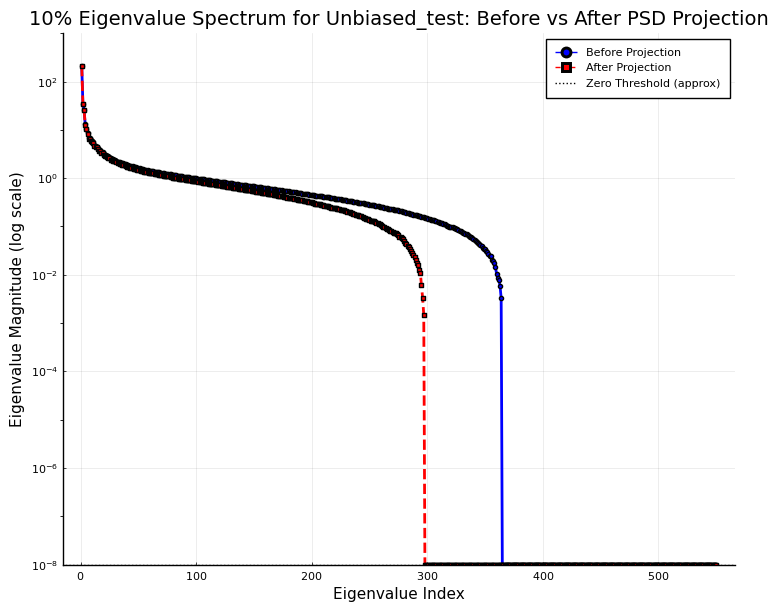

In [75]:
using Plots, LinearAlgebra, PyPlot  # This selects matplotlib as the backend


# Set PyPlot backend
Plots.pyplot()  # Switch to PyPlot backend
Plots.default(size=(800, 600))  # Set plot size

# Verify data
println("Checking data...")
@assert isdefined(Main, :A) "Matrix A is not defined!"
@assert isdefined(Main, :result2) "Matrix result2 is not defined!"

# Compute and sort eigenvalues
eigvals_A = sort(eigvals(Symmetric(A)), rev=true)
eigvals_result2 = sort(eigvals(Symmetric(result2)), rev=true)

println("Eigenvalues of A: min = ", minimum(eigvals_A), ", max = ", maximum(eigvals_A))
println("Eigenvalues of result: min = ", minimum(eigvals_result2), ", max = ", maximum(eigvals_result2))

# Shift negatives for log scale
eigvals_A_plot = max.(eigvals_A, 1e-8)
eigvals_result_plot = max.(eigvals_result2, 1e-8)

# Create the plot
p = Plots.plot(
    eigvals_A_plot,
    label="Before Projection",
    color=:blue,
    linewidth=2,
    marker=:circle,
    markersize=3,
    yscale=:log10,
    title="10% Eigenvalue Spectrum for Unbiased_test: Before vs After PSD Projection",
    xlabel="Eigenvalue Index",
    ylabel="Eigenvalue Magnitude (log scale)",
    grid=true,
    legend=:topright,
    ylims=(1e-8, 1e3),
    yticks=10.0 .^ (-10:2:2) 
)

Plots.plot!(
    eigvals_result_plot,
    label="After Projection",
    color=:red,
    linewidth=2,
    linestyle=:dash,
    marker=:square,
    markersize=3
)

Plots.hline!([1e-8], label="Zero Threshold (approx)", color=:black, linestyle=:dot, linewidth=1)

# Save and implicitly display with PyPlot
println("Saving to 'eigenvalue_spectrum_pyplot.png'...")
Plots.savefig(p, "eigenvalue_spectrum_pyplot_10%_Unbiased_test.png")
println("Saved. Check 'eigenvalue_spectrum_pyplot_10%_Unbiased_test.png'.")

## Systematic Test

Checking data...
Eigenvalues of A: min = -1.5645990112978363, max = 209.8205855871805
Eigenvalues of result: min = -6.89520694202543e-9, max = 209.65147963108265
Saving to 'eigenvalue_spectrum_pyplot.png'...
Saved. Check 'eigenvalue_spectrum_pyplot_10%_systematic_test.png'.

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


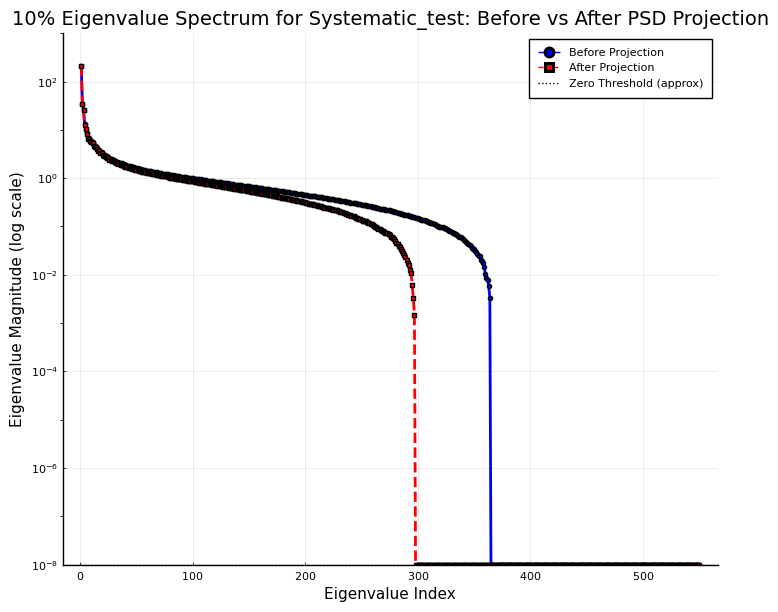

In [76]:
using Plots, LinearAlgebra, PyPlot

# Set PyPlot backend
Plots.pyplot()  # Switch to PyPlot backend
Plots.default(size=(800, 600))  # Set plot size

# Verify data
println("Checking data...")
@assert isdefined(Main, :A) "Matrix A is not defined!"
@assert isdefined(Main, :result2) "Matrix result2 is not defined!"

# Compute and sort eigenvalues
eigvals_A = sort(eigvals(Symmetric(A)), rev=true)
eigvals_result2 = sort(eigvals(Symmetric(result2)), rev=true)

println("Eigenvalues of A: min = ", minimum(eigvals_A), ", max = ", maximum(eigvals_A))
println("Eigenvalues of result: min = ", minimum(eigvals_result2), ", max = ", maximum(eigvals_result2))

# Shift negatives for log scale
eigvals_A_plot = max.(eigvals_A, 1e-8)
eigvals_result_plot = max.(eigvals_result2, 1e-8)

# Create the plot
p = Plots.plot(
    eigvals_A_plot,
    label="Before Projection",
    color=:blue,
    linewidth=2,
    marker=:circle,
    markersize=3,
    yscale=:log10,
    title="10% Eigenvalue Spectrum for Systematic_test: Before vs After PSD Projection",
    xlabel="Eigenvalue Index",
    ylabel="Eigenvalue Magnitude (log scale)",
    grid=true,
    legend=:topright,
    ylims=(1e-8, 1e3),
    yticks=10.0 .^ (-10:2:2)  
)

Plots.plot!(
    eigvals_result_plot,
    label="After Projection",
    color=:red,
    linewidth=2,
    linestyle=:dash,
    marker=:square,
    markersize=3
)

Plots.hline!([1e-8], label="Zero Threshold (approx)", color=:black, linestyle=:dot, linewidth=1)

# Save and implicitly display with PyPlot
println("Saving to 'eigenvalue_spectrum_pyplot.png'...")
Plots.savefig(p, "eigenvalue_spectrum_pyplot_10%__systematic_test.png")
println("Saved. Check 'eigenvalue_spectrum_pyplot_10%_systematic_test.png'.")

# Eigen Method

In [56]:
# Function to project onto the PSD matrix with timing
function Project_onto_PSD(A::Matrix{Float64}, timer::TimerOutput=to)::Matrix{Float64}
    local result3
    @timeit timer "Project_onto_PSD" begin
        λ, V = eigen(Symmetric(A))  # Eigenvalue decomposition
        λ[λ .< 0] .= 0.0  # Set all negative eigenvalues exactly to zero
        result3 = V * Diagonal(λ) * V'  # Reconstruct PSD matrix
    end
    return result3
end

Project_onto_PSD (generic function with 2 methods)

In [57]:
# Function to project onto the unit diagonal (in-place) with timing
function project_onto_UD!(A::Matrix{Float64}, timer::TimerOutput=to)::Matrix{Float64}
    @timeit timer "project_onto_UD!" begin
        for i in 1:size(A, 1)
            A[i, i] = 1.0
        end
    end
    return A
end

project_onto_UD! (generic function with 2 methods)

In [58]:
# Function for POCS with Dykstra's Correction with timing
function nearest_corr_dykstra(A::Matrix{Float64}, tol::Float64=1e-8, max_iter::Int=300, timer::TimerOutput=to)
    # Preallocate matrices for memory efficiency
    Y_k = copy(A)
    ΔS_k = zeros(size(A))
    R_k = similar(A)
    X_k = similar(A)
    diff_matrix = similar(A)

    @timeit timer "nearest_corr_dykstra" begin
        for k in 1:max_iter
            # Compute R_k = Y_k - ΔS_k in place
            R_k .= Y_k .- ΔS_k

            # Project R_k onto PSD cone with timing
            X_k .= Project_onto_PSD(R_k, timer)

            # Update ΔS_k = X_k - R_k in place
            ΔS_k .= X_k .- R_k

            # Project X_k onto unit diagonal in place with timing
            Y_k .= X_k
            project_onto_UD!(Y_k, timer)

            # Convergence check
            diff_matrix .= Y_k .- X_k
            if norm(diff_matrix, Inf) / norm(Y_k, Inf) <= tol
                println("Converged after $k iterations")
                return Y_k, k
            end
        end
        println("Reached maximum iterations ($max_iter) without convergence")
        return Y_k, max_iter
    end
end

nearest_corr_dykstra (generic function with 4 methods)

In [63]:
# Example
A_symm = A  # Matrix

println("=== POCS with Dykstra Using Eigen ===")
reset_timer!(to)  # Clear previous timings
result3, iterations = nearest_corr_dykstra(A_symm)
show(to)

# Verify the result is PSD
min_eigenval = minimum(eigen(Symmetric(result3)).values)
println("\nMinimum Eigenvalue after projection: ", min_eigenval)
println("|| A - X ||_F:: ", norm(A_symm - result3))

=== POCS with Dykstra Using Eigen ===
Converged after 29 iterations
─────────────────────────────────────────────────────────────────────────────────
                                        Time                    Allocations      
                               ───────────────────────   ────────────────────────
       Tot / % measured:            2.61s /  99.6%            351MiB /  96.7%    

Section                ncalls     time    %tot     avg     alloc    %tot      avg
─────────────────────────────────────────────────────────────────────────────────
nearest_corr_dykstra        1    2.60s  100.0%   2.60s    340MiB  100.0%   340MiB
  Project_onto_PSD         29    2.34s   90.0%  80.8ms    340MiB  100.0%  11.7MiB
  project_onto_UD!         29    292μs    0.0%  10.1μs     0.00B    0.0%    0.00B
─────────────────────────────────────────────────────────────────────────────────
Minimum Eigenvalue after projection: -4.512619945893688e-9
|| A - X ||_F:: 0.6068002458395192


In [64]:
eigvals(result3)

550-element Vector{Float64}:
  -4.512620083989918e-9
  -8.783550345191886e-11
  -4.864434554413439e-11
  -4.1680656862659516e-11
  -2.5310780058375537e-11
  -1.9773586716983258e-11
  -1.9368265622743684e-11
  -1.4613104241982716e-11
  -1.0575296840654985e-11
  -8.278004692498998e-12
  -7.41296308834821e-12
  -7.111505626748127e-12
  -6.588882983894438e-12
   ⋮
   3.938502597603573
   4.380012734797613
   4.59314181754557
   4.903493278415394
   5.649922051639144
   6.045380181223347
   7.707245097670568
   9.603718536697949
  12.335147626191198
  24.59566685938512
  32.738276082572064
 211.38263725593094

In [65]:
using LinearAlgebra

# Symmetrized result already computed
x = eigvals(Symmetric(result3))

# Count positive and negative eigenvalues
count_positive = sum(x .> 1e-8)  # Positive, above tolerance
count_negative = sum(x .< -1e-8) # Negative, below tolerance
count_zero = sum(abs.(x) .<= 1e-8)  # Effectively zero

# Print results
println("Number of positive eigenvalues: ", count_positive)
println("Number of negative eigenvalues: ", count_negative)
println("Number of zero eigenvalues: ", count_zero)
println("Is positive semi-definite: ", all(x .>= -1e-8))

Number of positive eigenvalues: 480
Number of negative eigenvalues: 0
Number of zero eigenvalues: 70
Is positive semi-definite: true


In [66]:
result3

550×550 Matrix{Float64}:
 1.0       0.340676   0.288962   …  0.399542   0.213409    0.582202
 0.340676  1.0        0.460498      0.31812    0.0268377   0.304092
 0.288962  0.460498   1.0           0.297825   0.0149432   0.237637
 0.332075  0.302759   0.258121      0.227616   0.0567664   0.307651
 0.48534   0.313548   0.296654      0.402294   0.258357    0.535087
 0.349303  0.184987   0.147323   …  0.173053  -0.0116948   0.391266
 0.559166  0.191582   0.202541      0.285358   0.123136    0.571799
 0.539222  0.381574   0.33511       0.360857   0.199938    0.545152
 0.480986  0.24356    0.203313      0.415167   0.33281     0.486448
 0.344872  0.312313   0.313335      0.366663   0.0111202   0.443839
 0.530035  0.420853   0.384961   …  0.437034   0.233521    0.446205
 0.343908  0.43513    0.314124      0.165898  -0.0481828   0.298011
 0.493861  0.354188   0.363206      0.342131   0.0597894   0.545064
 ⋮                               ⋱                         
 0.503352  0.502594   0.480922 

# **Comprehensive Comparison of Random and Systematic Deletion (5%–50%)**

This analysis investigates the impact of random and systematic deletion on a correlation matrix across 5% to 50% deletion levels. Higham’s projection method is applied to ensure the matrix remains positive semi-definite. LAPACK and Eigen solvers are compared in terms of numerical restoration quality and computational performance.

---

## 📋 Combined Results Table (Summary of Key Metrics)

The table summarizes:
- **Eigenvalue distributions** (before/after)
- **Matrix reconstruction error**
- **Iterations, time, and memory usage**
- **PSD status**

Note: LAPACK and Eigen produce the same numerical results; performance differences are shown separately.


| **Metric**                        | **5% Random Before (Both)** | **5% Random After (LAPACK)** | **5% Random After (Eigen)** | **5% Systematic Before (Both)** | **5% Systematic After (LAPACK)** | **5% Systematic After (Eigen)** | **10% Random Before (Both)** | **10% Random After (LAPACK)** | **10% Random After (Eigen)** | **10% Systematic Before (Both)** | **10% Systematic After (LAPACK)** | **10% Systematic After (Eigen)** | **20% Random Before (Both)** | **20% Random After (LAPACK)** | **20% Random After (Eigen)** | **20% Systematic Before (Both)** | **20% Systematic After (LAPACK)** | **20% Systematic After (Eigen)** | **30% Random Before (Both)** | **30% Random After (LAPACK)** | **30% Random After (Eigen)** | **30% Systematic Before (Both)** | **30% Systematic After (LAPACK)** | **30% Systematic After (Eigen)** | **40% Random Before (Both)** | **40% Random After (LAPACK)** | **40% Random After (Eigen)** | **40% Systematic Before (Both)** | **40% Systematic After (LAPACK)** | **40% Systematic After (Eigen)** | **50% Random Before (Both)** | **50% Random After (LAPACK)** | **50% Random After (Eigen)** | **50% Systematic Before (Both)** | **50% Systematic After (LAPACK)** | **50% Systematic After (Eigen)** |
|-----------------------------------|-----------------------------|------------------------------|-----------------------------|----------------------------------|-----------------------------------|----------------------------------|------------------------------|-------------------------------|------------------------------|-----------------------------------|------------------------------------|-----------------------------------|------------------------------|-------------------------------|------------------------------|-----------------------------------|------------------------------------|-----------------------------------|------------------------------|-------------------------------|------------------------------|-----------------------------------|------------------------------------|-----------------------------------|------------------------------|-------------------------------|------------------------------|-----------------------------------|------------------------------------|-----------------------------------|------------------------------|-------------------------------|------------------------------|-----------------------------------|------------------------------------|-----------------------------------|
| **Number of NaNs after deletion** | 35,575                     | —                            | —                           | 35,778                          | —                                 | —                                | 71,341                       | —                             | —                            | 71,555                           | —                                  | —                                 | 142,724                      | —                             | —                            | 143,110                          | —                                  | —                                 | 215,099                      | —                             | —                            | 214,665                          | —                                  | —                                 | 286,351                      | —                             | —                            | 286,220                          | —                                  | —                                 | 357,640                      | —                             | —                            | 357,775                          | —                                  | —                                 |
| **Positive eigenvalues**          | 489                        | 479                          | 479                         | 493                             | 483                               | 483                              | 451                          | 426                           | 426                          | 454                              | 432                                | 432                               | 396                          | 346                           | 346                          | 402                              | 356                                | 356                               | 358                          | 287                           | 287                          | 367                              | 297                                | 297                               | 332                          | 239                           | 239                          | 337                              | 248                                | 248                               | 307                          | 193                           | 193                          | 312                              | 201                                | 201                               |
| **Negative eigenvalues**          | 61                         | 0                            | 0                           | 57                              | 0                                 | 0                                | 99                           | 0                             | 0                            | 96                               | 0                                  | 0                                 | 154                          | 0                             | 0                            | 148                              | 0                                  | 0                                 | 192                          | 0                             | 0                            | 183                              | 0                                  | 0                                 | 218                          | 0                             | 0                            | 213                              | 0                                  | 0                                 | 243                          | 0                             | 0                            | 238                              | 0                                  | 0                                 |
| **Zero eigenvalues**              | 0                          | 71                           | 71                          | 0                               | 67                                | 67                               | 0                            | 124                           | 124                          | 0                                | 118                                | 118                               | 0                            | 204                           | 204                          | 0                                | 194                                | 194                               | 0                            | 263                           | 263                          | 0                                | 253                                | 253                               | 0                            | 311                           | 311                          | 0                                | 302                                | 302                               | 0                            | 357                           | 357                          | 0                                | 349                                | 349                               |
| **Minimum eigenvalue**            | -0.2233                    | -2.64e-9                     | -2.64e-9                    | -0.3463                         | -3.72e-9                          | -3.72e-9                         | -0.4211                      | -4.38e-9                      | -4.38e-9                     | -0.5833                          | -4.95e-9                           | -4.95e-9                          | -0.9379                      | -7.64e-9                      | -7.64e-9                     | -1.0913                          | -5.95e-9                           | -5.95e-9                          | -1.3484                      | -7.10e-9                      | -7.10e-9                     | -1.6480                          | -6.64e-9                           | -6.64e-9                          | -2.0004                      | -7.97e-9                      | -7.97e-9                     | -2.0392                          | -7.54e-9                           | -7.54e-9                          | -3.0879                      | -9.14e-9                      | -9.14e-9                     | -2.6647                          | -8.68e-9                           | -8.68e-9                          |
| **Maximum eigenvalue**            | 210.58                     | 210.58                       | 210.58                      | 210.11                          | 210.10                            | 210.10                           | 211.73                       | 211.71                        | 211.71                       | 210.11                           | 210.09                             | 210.09                            | 211.62                       | 211.53                        | 211.53                       | 210.72                           | 210.72                             | 210.72                            | 210.95                       | 210.75                        | 210.75                       | 211.32                           | 211.15                             | 211.15                            | 210.43                       | 210.05                        | 210.05                       | 212.53                           | 212.21                             | 212.21                            | 210.95                       | 210.24                        | 210.24                       | 214.23                           | 213.63                             | 213.63                            |
| **Is positive semi-definite?**    | False                      | True                         | True                        | False                           | True                              | True                             | False                        | True                          | True                         | False                            | True                               | True                              | False                        | True                          | True                         | False                            | True                               | True                              | False                        | True                          | True                         | False                            | True                               | True                              | False                        | True                          | True                         | False                            | True                               | True                              | False                        | True                          | True                         | False                            | True                               | True                              |
| **Matrix reconstruction error**   | —                          | 0.5641                       | 0.5641                      | —                               | 0.6342                            | 0.6342                           | —                            | 1.3439                        | 1.3439                       | —                                | 1.3330                             | 1.3330                            | —                            | 3.4434                        | 3.4434                       | —                                | 3.0799                             | 3.0799                            | —                            | 5.9834                        | 5.9834                       | —                                | 5.4109                             | 5.4109                            | —                            | 9.4753                        | 9.4753                       | —                                | 8.5484                             | 8.5484                            | —                            | 14.9035                       | 14.9035                      | —                                | 13.1109                            | 13.1109                           |
| **Iterations to converge**        | —                          | 17                           | 17                          | —                               | 21                                | 21                               | —                            | 30                            | 30                           | —                                | 29                                 | 29                                | —                            | 58                            | 58                           | —                                | 46                                 | 46                                | —                            | 85                            | 85                           | —                                | 67                                 | 67                                | —                            | 110                           | 110                          | —                                | 99                                 | 99                                | —                            | 196                           | 196                          | —                                | 170                                | 170                               |
| **Total time (seconds)**          | —                          | 1.07                         | 1.46                        | —                               | 1.84                              | 1.88                             | —                            | 2.77                          | 2.32                         | —                                | 3.44                               | 2.95                              | —                            | 3.73                          | 3.31                         | —                                | 2.94                               | 2.49                              | —                            | 5.40                          | 4.22                         | —                                | 4.24                               | 3.47                              | —                            | 11.0                          | 6.68                         | —                                | 9.00                               | 8.48                              | —                            | 19.3                          | 15.4                         | —                                | 12.5                               | 12.4                              |
| **Memory allocated (MiB)**        | —                          | 91.1                         | 237                         | —                               | 121                               | 283                              | —                            | 140                           | 351                          | —                                | 159                                | 377                               | —                            | 283                           | 691                          | —                                | 227                                | 550                               | —                            | 409                           | 1004                         | —                                | 325                                | 796                               | —                            | 526                           | 1300                         | —                                | 475                                | 1167                              | —                            | 929                           | 2304                         | —                                | 795                                | 1987                              |


---



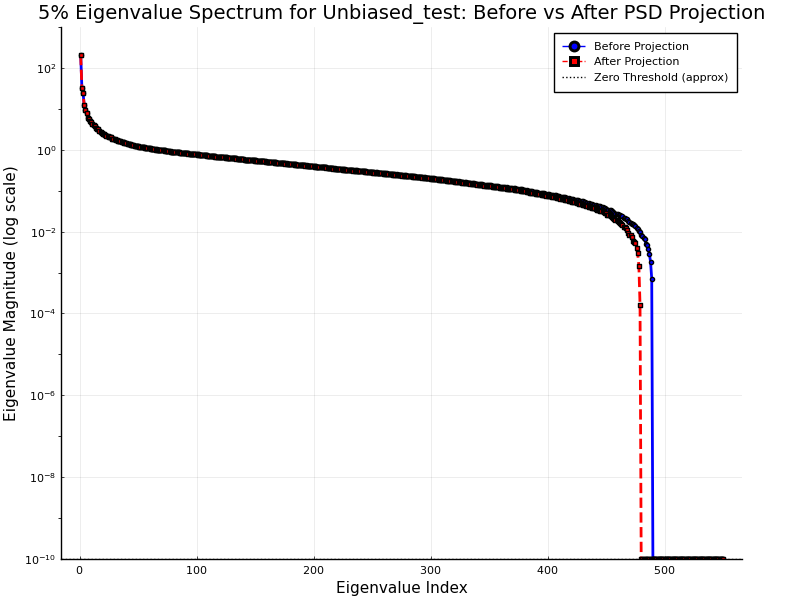

In [84]:
img = load(raw"C:\Users\Z2005081\Downloads\5 to 50% image\eigenvalue_spectrum_pyplot_5%_Unbiased_test.png")
display(img)

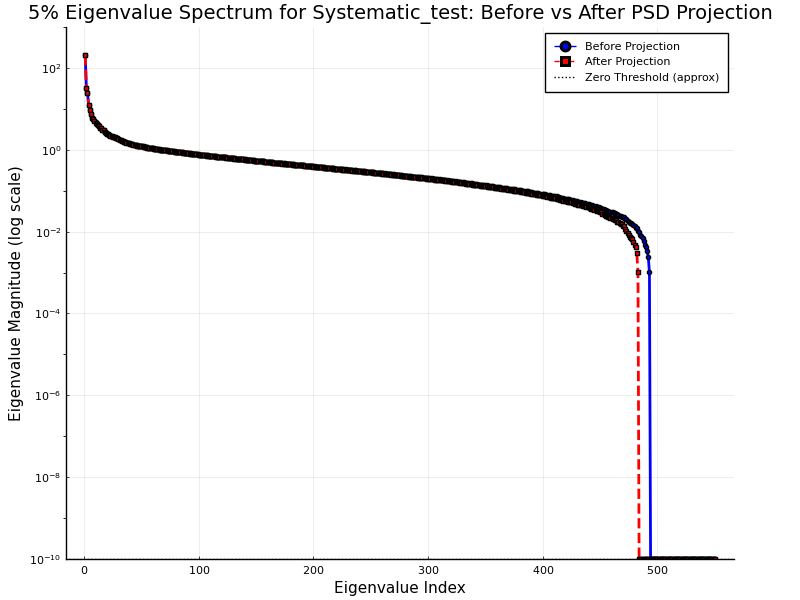

In [85]:
img = load(raw"C:\Users\Z2005081\Downloads\5 to 50% image\eigenvalue_spectrum_pyplot_5%__systematic_test.png")
display(img)

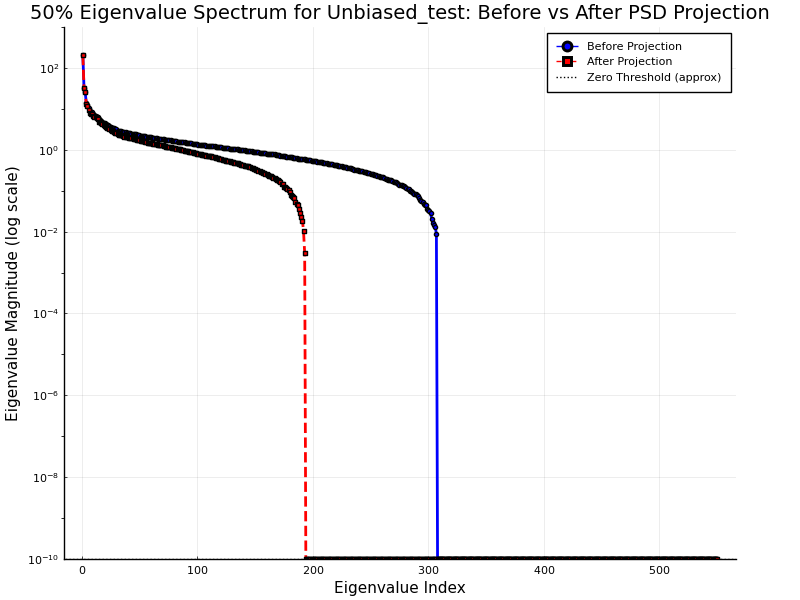

In [86]:
img = load(raw"C:\Users\Z2005081\Downloads\5 to 50% image\eigenvalue_spectrum_pyplot_50%_Unbiased_test.png")
display(img)

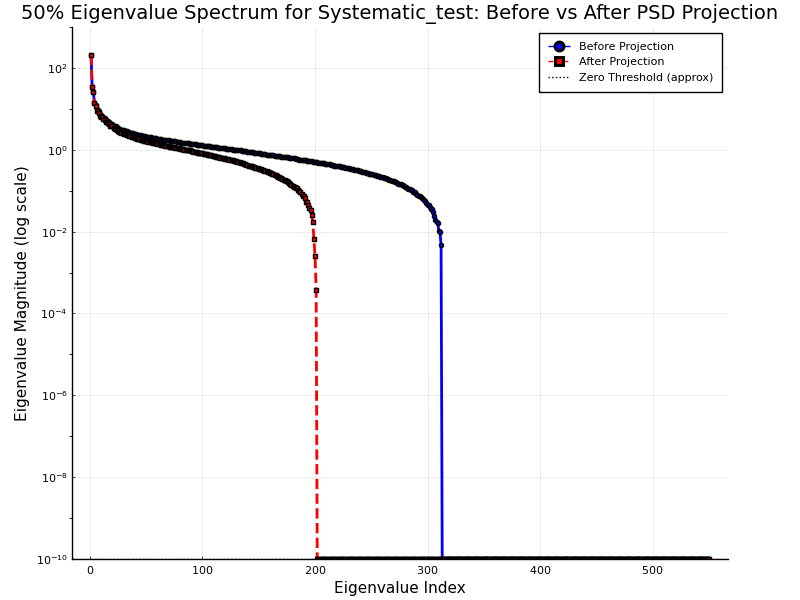

In [87]:
img = load(raw"C:\Users\Z2005081\Downloads\5 to 50% image\eigenvalue_spectrum_pyplot_50%__systematic_test.png")
display(img)

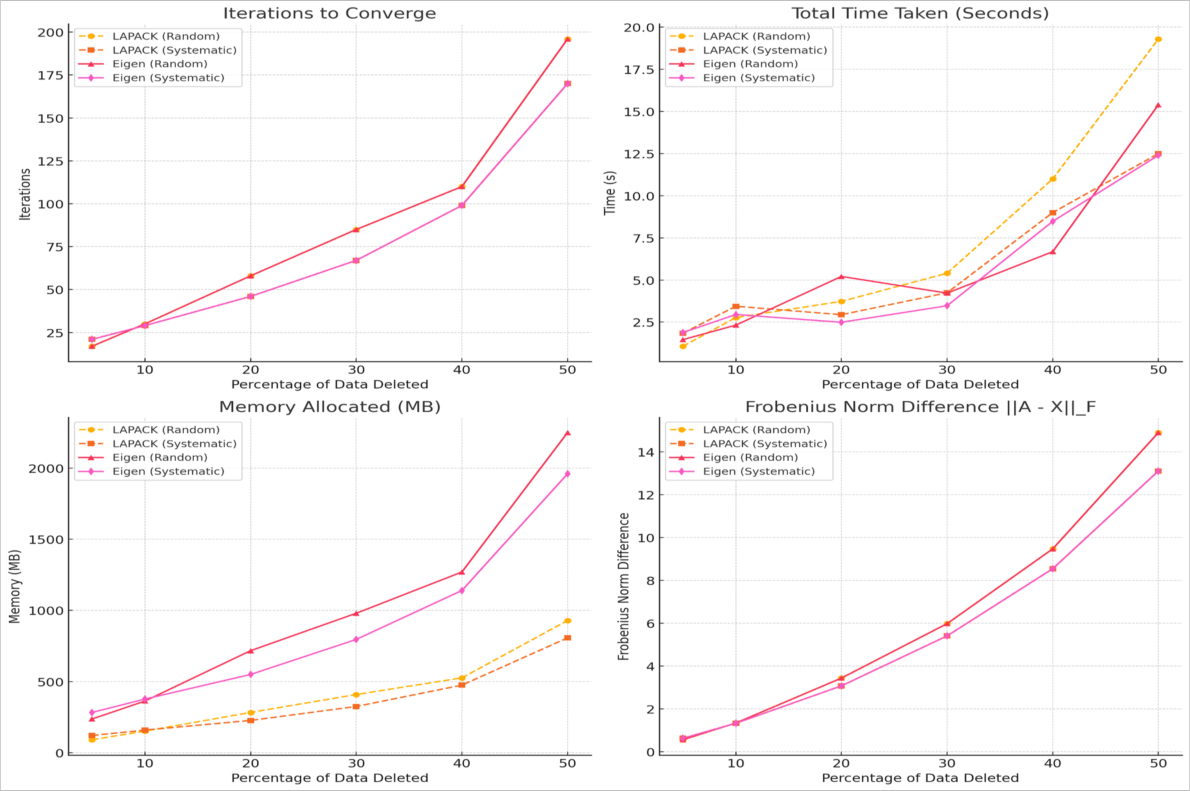

In [88]:
img = load(raw"C:\Users\Z2005081\Downloads\output_resized_2379x1580.png")
display(img)


| **Aspect**                  | **Key Finding**                                                                                                      | **Details**                                                                                                   |
|-----------------------------|---------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **Restoration of PSD**      | Higham’s projection restores positive semi-definiteness (PSD) across all scenarios, eliminating negative eigenvalues. | Negative eigenvalues increase with rate: Random (61 at 5% to 243 at 50%), Systematic (57 at 5% to 238 at 50%). Post-correction: Min eigenvalue ≈ -2.64e-9 (5% random) to -9.14e-9 (50% random), -3.72e-9 (5% systematic) to -8.68e-9 (50% systematic). Random shows more negative eigenvalues at higher rates. |
| **Eigenvalue Stability**    | Minimum eigenvalues become more negative with increasing deletion; random worse at 50%. Zero eigenvalues rise significantly. | Min eigenvalue: Random (-0.2233 at 5%, -0.4211 at 10%, -0.9379 at 20%, -1.3484 at 30%, -2.0004 at 40%, -3.0879 at 50%); Systematic (-0.3463 at 5%, -0.5833 at 10%, -1.0913 at 20%, -1.6480 at 30%, -2.0392 at 40%, -2.6647 at 50%). Zero eigenvalues: Random (71 at 5% to 357 at 50%), Systematic (67 at 5% to 349 at 50%). Random consistently has more zero eigenvalues. |
| **Matrix Reconstruction Accuracy** | Matrix reconstruction error increases nonlinearly with deletion rate; systematic less perturbing at 20%–50%.         | Error: Random (0.5641 at 5%, 1.3439 at 10%, 3.4434 at 20%, 5.9834 at 30%, 9.4753 at 40%, 14.9035 at 50%); Systematic (0.6342 at 5%, 1.3330 at 10%, 3.0799 at 20%, 5.4109 at 30%, 8.5484 at 40%, 13.1109 at 50%). Systematic higher at 5% (12.4%), lower at 20%–50% (e.g., 12% less at 50%). |
| **Computational Performance (Time)** | LAPACK faster at 5%, Eigen faster at 10%–50%. Systematic less time-intensive at 20%–50%.                          | LAPACK: Random (1.07s at 5%, 2.77s at 10%, 3.73s at 20%, 5.40s at 30%, 11.0s at 40%, 19.3s at 50%), Systematic (1.84s at 5%, 3.44s at 10%, 2.94s at 20%, 4.24s at 30%, 9.00s at 40%, 12.5s at 50%). Eigen: Random (1.46s at 5%, 2.32s at 10%, 3.31s at 20%, 4.22s at 30%, 6.68s at 40%, 15.4s at 50%), Systematic (1.88s at 5%, 2.95s at 10%, 2.49s at 20%, 3.47s at 30%, 8.48s at 40%, 12.4s at 50%). Eigen speed advantage: 1%–39%. |
| **Computational Performance (Iterations)** | Iterations increase with deletion rate; systematic requires fewer at 20%–50%.                                   | Random: 17 (5%), 30 (10%), 58 (20%), 85 (30%), 110 (40%), 196 (50%). Systematic: 21 (5%), 29 (10%), 46 (20%), 67 (30%), 99 (40%), 170 (50%). Systematic fewer by 11%–21% at 20%–50%. |
| **Computational Performance (Memory)** | Eigen uses 2.3–2.6× more memory than LAPACK; memory peaks at 50% random.                                          | LAPACK: Random (91.1 MiB at 5%, 140 MiB at 10%, 283 MiB at 20%, 409 MiB at 30%, 526 MiB at 40%, 929 MiB at 50%), Systematic (121 MiB at 5%, 159 MiB at 10%, 227 MiB at 20%, 325 MiB at 30%, 475 MiB at 40%, 795 MiB at 50%). Eigen: Random (237 MiB at 5%, 351 MiB at 10%, 691 MiB at 20%, 1004 MiB at 30%, 1300 MiB at 40%, 2304 MiB at 50%), Systematic (283 MiB at 5%, 377 MiB at 10%, 550 MiB at 20%, 796 MiB at 30%, 1167 MiB at 40%, 1987 MiB at 50%). Systematic uses 14%–16% less at 50%. |
| **Random vs. Systematic Trends** | Systematic deletion less perturbing and computationally demanding at higher rates (20%–50%).                      | At 5%: Systematic worse (error 0.6342 vs. 0.5641). At 20%–50%: Systematic better (e.g., error 13.1109 vs. 14.9035, time 12.5s vs. 19.3s LAPACK, iterations 170 vs. 196 at 50%). Random more unstable (e.g., min eigenvalue -3.0879 vs. -2.6647 at 50%). |

*Notes*: 
- LAPACK and Eigen produce numerically identical results post-correction; differences are in performance only.
- Systematic deletion shows advantages in accuracy and efficiency at higher rates, despite initial higher perturbation at 5%.
- All metrics reflect trends as deletion increases from 5% to 50%.

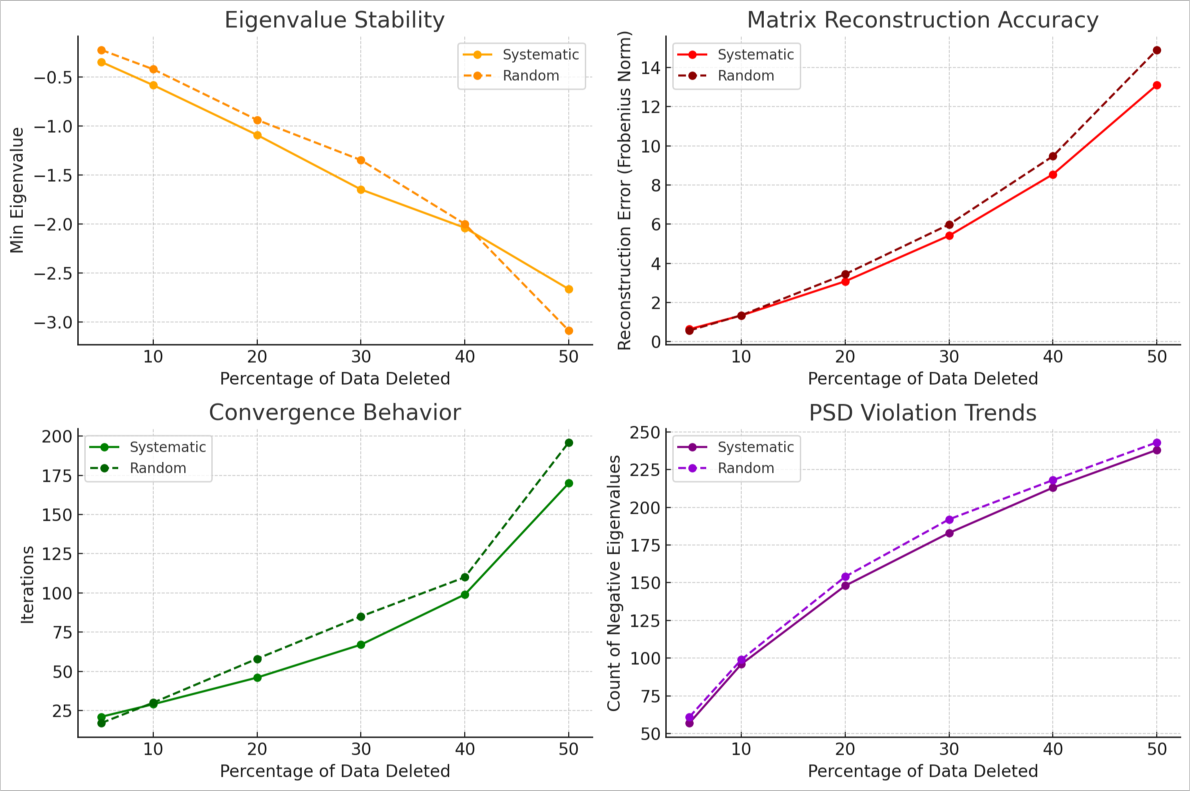

In [89]:
img = load(raw"C:\Users\Z2005081\Downloads\34CD1F91-B3DE-41A6-B2FD-2382786AB83E.png")
display(img)

# Key Algorithms in NearestCorrelationMatrix.jl

In [31]:
using NearestCorrelationMatrix, LinearAlgebra, Random

# Create a symmetric matrix

# Create the NCM problem
prob = NCMProblem(A)

# Initialize the solver with Alternating Projections algorithm
solver = init(prob, AlternatingProjections())

# Solve with verbosity enabled
sol = solve!(solver; verbose=true)

# Extract the result matrix
X_corr = sol.X

# Get iteration count (still via getfield)
num_iters = getfield(sol, 4)

# Diagnostics
min_eig = minimum(eigen(Symmetric(X_corr)).values)
diag_ok = all(abs.(diag(X_corr) .- 1.0) .< 1e-8)
fro_error = norm(A - X_corr)

# Print everything
println("\n=== Result Summary ===")
println("Algorithm: Alternating Projections")
println("Number of iterations: ", num_iters)
println("Minimum eigenvalue: ", min_eig)
println("Diagonal ≈ 1: ", diag_ok)
println("Frobenius norm error: ", fro_error)



=== Result Summary ===
Algorithm: Alternating Projections
Number of iterations: 29
Minimum eigenvalue: -3.16981832763086e-15
Diagonal ≈ 1: true
Frobenius norm error: 0.6068002468053937


In [39]:
using NearestCorrelationMatrix, LinearAlgebra, Random

# Create a symmetric matrix

# Create the NCM problem
prob = NCMProblem(A)

# Initialize the solver with Alternating Projections algorithm
solver = init(prob, Newton())

# Solve with verbosity enabled
sol = solve!(solver; verbose=true)

# Extract the result matrix
X_corr = sol.X

# Get iteration count (still via getfield)
num_iters = getfield(sol, 4)

# Diagnostics
min_eig = minimum(eigen(Symmetric(X_corr)).values)
diag_ok = all(abs.(diag(X_corr) .- 1.0) .< 1e-8)
fro_error = norm(A - X_corr)

# Print everything
println("\n=== Result Summary ===")
println("Algorithm: Alternating Projections")
println("Number of iterations: ", num_iters)
println("Minimum eigenvalue: ", min_eig)
println("Diagonal ≈ 1: ", diag_ok)
println("Frobenius norm error: ", fro_error)



=== Result Summary ===
Algorithm: Alternating Projections
Number of iterations: 4
Minimum eigenvalue: 6.37106404152512e-12
Diagonal ≈ 1: true
Frobenius norm error: 0.606800247330146


In [40]:
using NearestCorrelationMatrix, LinearAlgebra, Random

# Create a symmetric matrix

# Create the NCM problem
prob = NCMProblem(A)

# Initialize the solver with Alternating Projections algorithm
solver = init(prob, DirectProjection())

# Solve with verbosity enabled
sol = solve!(solver; verbose=true)

# Extract the result matrix
X_corr = sol.X

# Get iteration count (still via getfield)
num_iters = getfield(sol, 4)

# Diagnostics
min_eig = minimum(eigen(Symmetric(X_corr)).values)
diag_ok = all(abs.(diag(X_corr) .- 1.0) .< 1e-8)
fro_error = norm(A - X_corr)

# Print everything
println("\n=== Result Summary ===")
println("Algorithm: Alternating Projections")
println("Number of iterations: ", num_iters)
println("Minimum eigenvalue: ", min_eig)
println("Diagonal ≈ 1: ", diag_ok)
println("Frobenius norm error: ", fro_error)



=== Result Summary ===
Algorithm: Alternating Projections
Number of iterations: 1
Minimum eigenvalue: -5.7344855111809325e-15
Diagonal ≈ 1: true
Frobenius norm error: 1.6933535301316383


# Sources: discourse.julialang.org, google, grok, github, google scholar, wikipedia.org